# Decoding the Stack Overflow Annual Developer Survey 2018
***
The CRISP-DM Process (Cross Industry Process for Data Mining):

1. Business Understanding

2. Data Understanding

3. Prepare Data

4. Data Modeling

5. Evaluate the Results

6. Deploy/Communicate the results

***

## 1. Business Understanding
Each year, the Stack Overflow ask the developer community about everything from their favorite technologies to their job preferences. This year marks the eighth year they have published Annual Developer Survey results—with the largest number of respondents yet. Over 100,000 developers took the 30-minute survey this past January.

***Real world questions I would like to ask:***
   1. What languages, frameworks, & databases were most popular?
   2. What are the top 5 developer types?
   3. What is the proportion of the respondents who contributed to the Open Source or code as a hobby?
   4. Which are the countries from which more response was received? (top countries with largest number of respondents)
   5. What is the developer's primary Operating System?


## 2. Data Understanding
We will be using the `Stack Overflow Annual Developer Survey 2018` data from ["Stack Overflow survey site"](https://insights.stackoverflow.com/survey) to get some insight into each of these questions which can be downloaded from this [link](https://drive.google.com/uc?export=download&id=1_9On2-nsBQIw3JiY43sWbrF8EjrqrR4U). The dataset is investigated before any processing.

## 3. Prepare Data
This step further consists of 3 steps:
1. Gather the data
2. Assess the data
3. Clean the data

### 3.1. Gather the data
First, let's read in the data and necessary libraries.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from collections import Counter

# Allows the use of display() for DataFrames
from IPython.display import display 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# magic word for producing visualizations in notebook
%matplotlib inline

# Load the dataset
df = pd.read_csv('survey_results_public.csv')

# Success - Provide the number of rows and columns in the dataset
print("The dataset has {} data points with {} variables each.".format(*df.shape))

C:\Users\rahul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The dataset has 98855 data points with 129 variables each.


### 3.2. Assess the data
In order to get a better understanding of the data, let's take a look at some of the characteristics of the dataset.

In [2]:
# Display the first 5 records
pd.options.display.max_columns = 150
display(df.head())

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [3]:
# Checking random samples
df.sample(5)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
71850,3706,Yes,No,United States,No,"Independent contractor, freelancer, or self-em...","Secondary school (e.g. American high school, G...",NaN,NaN,Back-end developer;Front-end developer;Full-st...,9-11 years,0-2 years,Extremely satisfied,Extremely satisfied,Doing the same work,I am not interested in new job opportunities,I've never had a job,4.0,6.0,5.0,2.0,7.0,3.0,9.0,1.0,10.0,8.0,5.0,2.0,3.0,6.0,8.0,7.0,4.0,1.0,10.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,My job status or other personal status changed,U.S. dollars ($),NaN,Monthly,NaN,USD,"Google Hangouts/Chat;Other chat system (IRC, p...",NaN,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,NaN,Strongly agree,Neither Agree nor Disagree,Agree,C#;Java;JavaScript;TypeScript;HTML;CSS,C#;JavaScript;TypeScript;Kotlin;HTML;CSS,SQL Server,NaN,Amazon Echo;Android;Azure;Raspberry Pi;Windows...,Android;Azure;Gaming console;Google Home;Raspb...,.NET Core,.NET Core;Node.js;React;TensorFlow,Android Studio;IntelliJ;Visual Studio;Visual S...,Windows,1,Scrum,Git,A few times per week,Yes,Yes,The website I was visiting forced me to disabl...,Somewhat agree,Strongly agree,Neither agree nor disagree,Saw an online advertisement and then researche...,4.0,3.0,1.0,2.0,6.0,7.0,5.0,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",The person who came up with the idea,Unsure / I don't know,10 (Very Likely),Multiple times per day,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a jobs boar...","No, I have one but it's out of date",NaN,Yes,A little bit interested,Not at all interested,Somewhat interested,Very interested,A little bit interested,I do not have a set schedule,5 - 8 hours,1 - 2 hours,1 - 2 times per week,NaN,Daily or almost every day,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Whit

In [4]:
# Checking data types & other informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


In [5]:
# descriptive analysis
df.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64918.000000,64917.000000,48706.000000,48706.000000,48706.000000,48706.000000,48706.000000,46213.000000,46213.000000,46213.000000,46213.000000,46213.000000,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,6.057804,1.884177,6.080609,4.450553,7.563218,7.068101,5.765581,6.948196,5.615053,7.920746,6.865061,5.838625,3.035396,1.560588,3.849998,3.005112,3.548906,3.709541,4.224309,3.796572,3.015602,3.443338,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,2.663405,1.880973,3.080841,2.808365,2.830099,2.638513,2.851319,2.746491,2.782918,2.765758,2.687617,2.706479,1.326079,0.906463,1.315095,1.160622,1.116461,2.071172,1.842500,2.082178,1.651321,1.983163,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,4.000000,1.000000,3.000000,2.000000,5.000000,5.000000,3.000000,5.000000,3.000000,6.000000,5.000000,4.000000,2.000000,1.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,6.000000,1.000000,6.000000,4.000000,8.000000,7.000000,5.000000,7.000000,5.000000,9.000000,7.000000,6.000000,3.000000,1.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,8.000000,2.000000,9.000000,6.000000,10.000000,9.000000,8.000000,9.000000,8.000000,10.000000,9.000000,8.000000,4.000000,2.000000,5.000000,4.000000,4.000000,6.000000,6.000000,6.000000,4.000000,5.000000,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [6]:
# Checking for any duplicated values
df.duplicated().sum()

0

In [7]:
# number of missing data points in each columns
df.isnull().sum()

Respondent                         0
Hobby                              0
OpenSource                         0
Country                          412
Student                         3954
Employment                      3534
FormalEducation                 4152
UndergradMajor                 19819
CompanySize                    27324
DevType                         6757
YearsCoding                     5020
YearsCodingProf                20952
JobSatisfaction                29579
CareerSatisfaction             22351
HopeFiveYears                  23137
JobSearchStatus                19367
LastNewJob                     19966
AssessJob1                     31870
AssessJob2                     31870
AssessJob3                     31870
AssessJob4                     31870
AssessJob5                     31870
AssessJob6                     31870
AssessJob7                     31870
AssessJob8                     31870
AssessJob9                     31870
AssessJob10                    31870
A

In [8]:
# Provide a set of columns with more than 50% of the values missing

set(df.columns[df.isnull().mean() > 0.5])

{'AdBlockerReasons',
 'ConvertedSalary',
 'ErgonomicDevices',
 'HackathonReasons',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'MilitaryUS',
 'StackOverflowJobsRecommend',
 'TimeAfterBootcamp'}

In [9]:
# Provide a set of columns with more than 75% of the values missing

set(df.columns[df.isnull().mean() > 0.75])

{'MilitaryUS', 'TimeAfterBootcamp'}

**Checking the columns from which we can answer the questions asked in `Business Understanding` section.**

In [10]:
# number of missing data points in selected columns

df.OpenSource.isnull().sum()

0

In [11]:
df.Hobby.isnull().sum()

0

In [12]:
df.OperatingSystem.isnull().sum()

22676

In [13]:
df.Country.isnull().sum()

412

In [14]:
df.LanguageWorkedWith.isnull().sum()

20521

In [15]:
df.FrameworkWorkedWith.isnull().sum()

47235

In [16]:
df.DatabaseWorkedWith.isnull().sum()

32585

In [17]:
df.DevType.isnull().sum()

6757

In [18]:
df.FrameworkWorkedWith.value_counts()

.NET Core                                                                                   4517
Node.js                                                                                     4453
Node.js;React                                                                               3436
Spring                                                                                      2830
Angular;Node.js                                                                             2594
Angular                                                                                     2561
Django                                                                                      1931
React                                                                                       1712
Angular;Node.js;React                                                                       1613
Angular;.NET Core                                                                           1297
Angular;.NET Core;Node.js     

In [19]:
df.DatabaseWorkedWith.value_counts()

MySQL                                                                                                                               5968
SQL Server                                                                                                                          5090
SQL Server;MySQL                                                                                                                    3017
PostgreSQL                                                                                                                          2091
MySQL;PostgreSQL                                                                                                                    1400
SQLite                                                                                                                              1333
MongoDB                                                                                                                             1193
MongoDB;MySQL                            

In [20]:
df.LanguageWorkedWith.value_counts()

C#;JavaScript;SQL;HTML;CSS                                                                               1347
JavaScript;PHP;SQL;HTML;CSS                                                                              1235
Java                                                                                                     1030
JavaScript;HTML;CSS                                                                                       881
C#;JavaScript;SQL;TypeScript;HTML;CSS                                                                     828
JavaScript;PHP;SQL;HTML;CSS;Bash/Shell                                                                    768
JavaScript;PHP;HTML;CSS                                                                                   725
Java;JavaScript;SQL;HTML;CSS                                                                              530
C#                                                                                                        491
Python    

In [21]:
df.Country.value_counts()

United States                            20309
India                                    13721
Germany                                   6459
United Kingdom                            6221
Canada                                    3393
Russian Federation                        2869
France                                    2572
Brazil                                    2505
Poland                                    2122
Australia                                 2018
Netherlands                               1841
Spain                                     1769
Italy                                     1535
Ukraine                                   1279
Sweden                                    1164
Pakistan                                  1050
China                                     1037
Switzerland                               1010
Turkey                                    1004
Israel                                    1003
Iran, Islamic Republic of...               921
Romania      

In [22]:
df.OpenSource.value_counts()

No     55769
Yes    43086
Name: OpenSource, dtype: int64

In [23]:
df.OperatingSystem.value_counts()

Windows        38022
MacOS          20325
Linux-based    17684
BSD/Unix         148
Name: OperatingSystem, dtype: int64

In [24]:
df.Hobby.value_counts()

Yes    79897
No     18958
Name: Hobby, dtype: int64

> **Note:** Assessment of the dataset has been done. To answer the questions asked in the ***Business Understanding*** section, we need only 8 columns from the dataset which are `'OpenSource'`, `'Hobby'`, `'OperatingSystem'`, `'Country'`, `'LanguageWorkedWith'`, `'FrameworkWorkedWith'`, `'DatabaseWorkedWith'`, and `'DevType'`.

> **Categorical values:**
   - All the 8 columns contains categorical data; but there is no need to encode them as we can answer the questions without any ML techniques.
   - The columns `'OpenSource'`, `'Hobby'`, and `'Country'` contains only one value in each row, so we did not need to do any handling for their categorical values.
   - The columns `'OperatingSystem'`, `'LanguageWorkedWith'`, `'FrameworkWorkedWith'`, `'DatabaseWorkedWith'`, and `'DevType'` contains multiple values in each row separated by `';'`, so we need to handle these multiple values to gain insights from these columns.
   
> **Missing values:**
   - The columns `'OpenSource'` and `'Hobby'` does not contains any missing values.
   - The columns `'Country'`, `'OperatingSystem'`, `'LanguageWorkedWith'`, `'FrameworkWorkedWith'`, `'DatabaseWorkedWith'`, and `'DevType'` contains `412`, `22676`, `20521`, `47235`, `32585` and `6757` missing values respectively.
   - Three strategies for working with missing values include:
       1. ***We can drop the rows or columns holding the missing values:*** We don't want to loose any data so this step won't work for us.
       2. ***We can impute the missing values:*** Since, these missing data are categorical values; so its not a good idea to impute them with any false data. So, this step also won't work for us.
       3. ***We can work around them, and only use the information provided:*** We will follow this step as we can use the information provided to answer the questions without worrying about missing values.
       

### 3.3. Clean the data
Droping the columns not needed.

In [25]:
needed_col = ['OpenSource', 'Hobby', 'OperatingSystem', 'Country', 'LanguageWorkedWith', 
                                  'FrameworkWorkedWith', 'DatabaseWorkedWith', 'DevType']
not_needed_col = []

for col in df.columns: 
    if col not in needed_col:
        not_needed_col.append(col)

len(not_needed_col)

121

In [26]:
df.drop(columns=not_needed_col, inplace=True)
df.shape

(98855, 8)

In [27]:
df.head()

,Hobby,OpenSource,Country,DevType,LanguageWorkedWith,DatabaseWorkedWith,FrameworkWorkedWith,OperatingSystem
0,Yes,No,Kenya,Full-stack developer,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Django;React,Linux-based
1,Yes,Yes,United Kingdom,Database administrator;DevOps specialist;Full-...,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached,Django,Linux-based
2,Yes,Yes,United States,Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN
3,No,No,United States,Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...",NaN,Windows
4,Yes,No,South Africa,Data or business analyst;Desktop or enterprise...,C;C++;Java;Matlab;R;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,NaN,Windows


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Data columns (total 8 columns):
Hobby                  98855 non-null object
OpenSource             98855 non-null object
Country                98443 non-null object
DevType                92098 non-null object
LanguageWorkedWith     78334 non-null object
DatabaseWorkedWith     66270 non-null object
FrameworkWorkedWith    51620 non-null object
OperatingSystem        76179 non-null object
dtypes: object(8)
memory usage: 6.0+ MB


## 4. Data Modeling
We don't need any ML or deep learning techniques to answer the questions.


## 5. Evaluate the Results

In [73]:
# function for getting most used items and plotting them according to user count.

def get_most_used(column_name, title_name, k=7, figsize=(8,5)):
    '''
    INPUT:
        column_name - string - name of the column in which you would like to 
                        get the count of top 'k' frequently encountered words.
        title_name - string - title for the figure plotted.
        k - integer - total number of most popular words.
        figsize - tuple - size of figure to be plotted.
    OUTPUT:
        creates a horizontal bar plot.
    '''
    # Concatenate strings in the Series into one
    combined_string = df[column_name].str.cat(sep=';')

    # split() returns list of all the words in the string 
    split_it = combined_string.split(';') 
  
    # Pass the split_it list to instance of Counter class. 
    count = Counter(split_it) 
  
    # most_common() produces k frequently encountered input values and their respective counts. 
    most_occur = count.most_common(k)
    df_new = pd.DataFrame(most_occur, columns=['Items', 'User_Count'])
    
    plt.figure(figsize=figsize)
    plt.barh(df_new.Items, df_new.User_Count)
    plt.xlabel('User Count', fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=14)
    plt.title(title_name, fontsize=21)
    plt.gca().invert_yaxis();

### Question 1
What languages, frameworks, & databases were most popular?

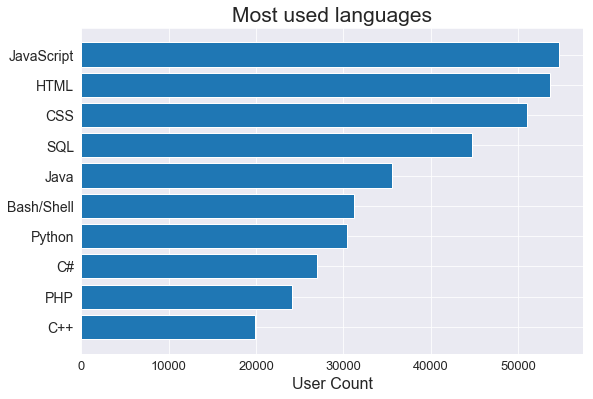

In [74]:
get_most_used('LanguageWorkedWith', 'Most used Languages', 10, figsize=(9,6))

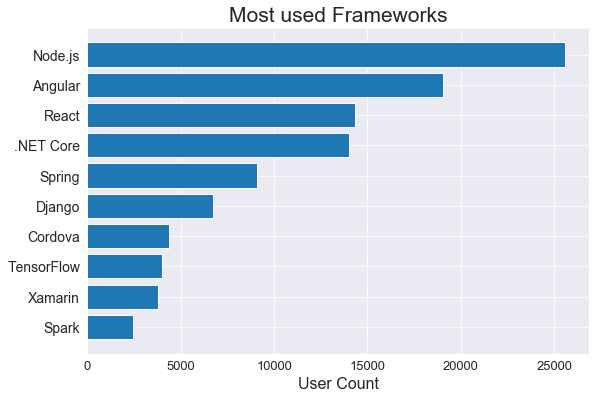

In [75]:
get_most_used('FrameworkWorkedWith', 'Most used Frameworks', 10, figsize=(9,6))

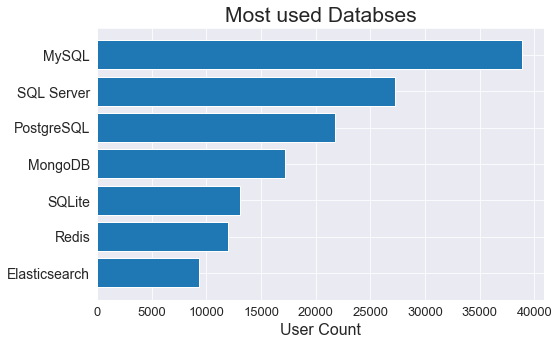

In [76]:
get_most_used('DatabaseWorkedWith', 'Most used Databses')

### Question 2
What are the top 5 developer types?

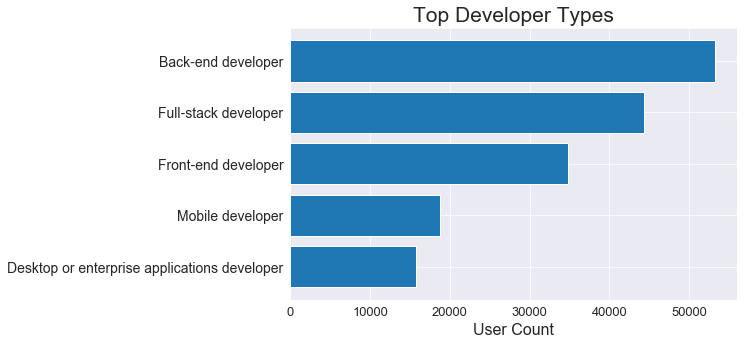

In [77]:
get_most_used('DevType', 'Top Developer Types', 5)

### Question 3
What is the proportion of the respondents who contributed to the Open Source or code as a hobby?

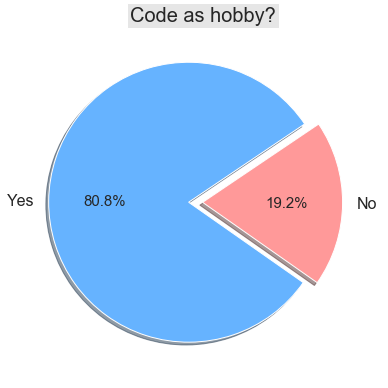

In [71]:
count_hobby = df.Hobby.value_counts()

# only "explode" the 1st slice 
explode = (0.1, 0)  
fig1, ax1 = plt.subplots(figsize=(5.5, 5.5))
patches, texts, autotexts = ax1.pie(count_hobby, explode=explode, labels=['Yes', 'No'], autopct='%1.1f%%',
                                    colors=['#66b3ff', '#ff9999'], shadow=True, startangle=34)
for x in range(2):
    texts[x].set_fontsize(16)
    autotexts[x].set_fontsize(15)

plt.title('Code as hobby?', fontsize=20, bbox={'facecolor':'0.9', 'pad':3})
plt.tight_layout()

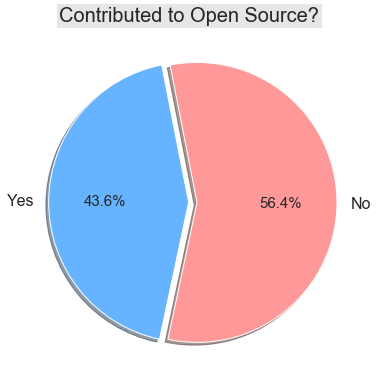

In [69]:
count_opensource = df.OpenSource.value_counts()

# only "explode" the 1st slice 
explode = (0.06, 0)  
fig2, ax2 = plt.subplots(figsize=(5.5, 5.5))
patches, texts, autotexts = ax2.pie(count_opensource, explode=explode, labels=['No', 'Yes'], autopct='%1.1f%%',
                                    colors=['#ff9999', '#66b3ff'], shadow=True, startangle=258)
for x in range(2):
    texts[x].set_fontsize(16)
    autotexts[x].set_fontsize(15)

plt.title('Contributed to Open Source?', fontsize=20, bbox={'facecolor':'0.9', 'pad':3})
plt.tight_layout()

### Question 4
Which are the countries from which more response was received? (top countries with largest number of respondents)

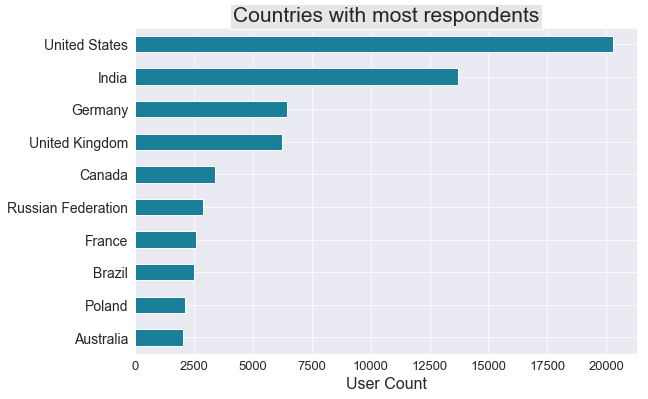

In [67]:
df.Country.value_counts()[:10].plot(kind='barh', figsize=(9, 6), color=(0.1, 0.5, 0.6))
plt.title('Countries with most respondents', fontsize=21, bbox={'facecolor':'0.9', 'pad':3})
plt.xlabel('User Count', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=14)
plt.gca().invert_yaxis();

### Question 5
What is the developer's primary Operating System?

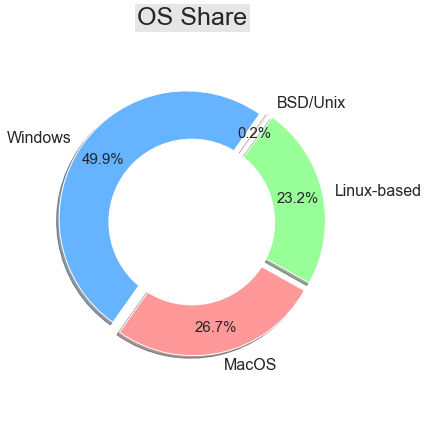

In [72]:
count_os = df.OperatingSystem.value_counts()
 
explode = (0.05, 0.05, 0.05, 0.05)
colors = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
labels = ['Windows', 'MacOS', 'Linux-based', 'BSD/Unix'] 
fig3, ax3 = plt.subplots(figsize=(6, 6))
patches, texts, autotexts = ax3.pie(count_os, explode=explode, labels=labels, autopct='%1.1f%%',
                                    colors=colors, shadow=True, startangle=55, pctdistance=0.8)
for x in range(4):
    texts[x].set_fontsize(16)
    autotexts[x].set_fontsize(15)
    
#draw circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax3.axis('equal')
plt.title('OS Share', fontsize=25, bbox={'facecolor':'0.9', 'pad':3})
plt.tight_layout()

## 6. Deploy/Communicate the results
Results are published on Medium: [Decoding the Stack Overflow Annual Developer Survey 2018](https://medium.com/@rahulranjan98/decoding-the-stack-overflow-developer-survey-2018-e41011872dda)